# Yuki Tsunoda
<img src="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/image.img.1920.medium.jpg/1641829679198.jpg" width="300">

### Team: AlphaTauri
<img src ="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/helmet.img.png/1646824917377.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [4]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

# Filtering Lap Data for ALFA TAURI
tauri_lap <- lap_data %>%
             filter(driverId %in% c(826, 843))

# Season Analysis

In [5]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



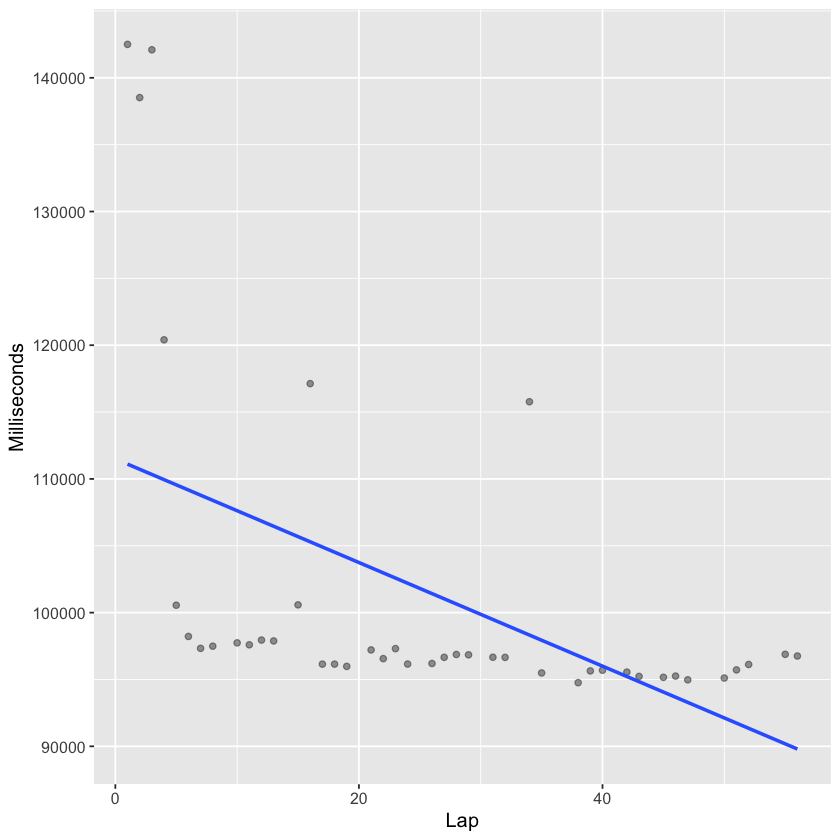

In [6]:
set.seed(2022)

#1. Bahrain 

yt_bahrain <- tsu_laps %>%
                filter(raceId %in% bahrain_race_ID) 

yt_bahrain_clean <- yt_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_bahrain_clean_ID <- yt_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_bahrain_races <- tsu_laps %>%
                    filter(raceId %in% yt_bahrain_clean_ID)

formulaone_split <- initial_split(yt_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



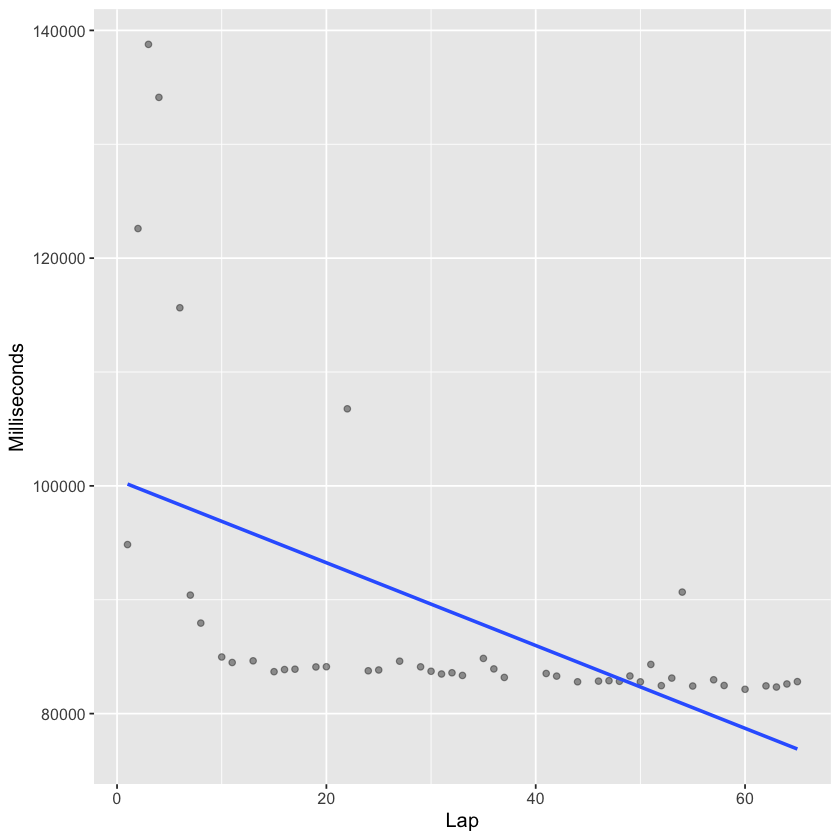

In [7]:
set.seed(2022)

#2. Portimão

yt_Portimão <- tsu_laps %>%
                filter(raceId %in% Portimão_race_ID) 

yt_Portimão_clean <- yt_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_Portimão_clean
yt_Portimão_clean_ID <- yt_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_Portimão_races <- tsu_laps %>%
                    filter(raceId %in% yt_Portimão_clean_ID) 

formulaone_split <- initial_split(yt_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
900,57
989,57
1010,57
969,56


`geom_smooth()` using formula 'y ~ x'



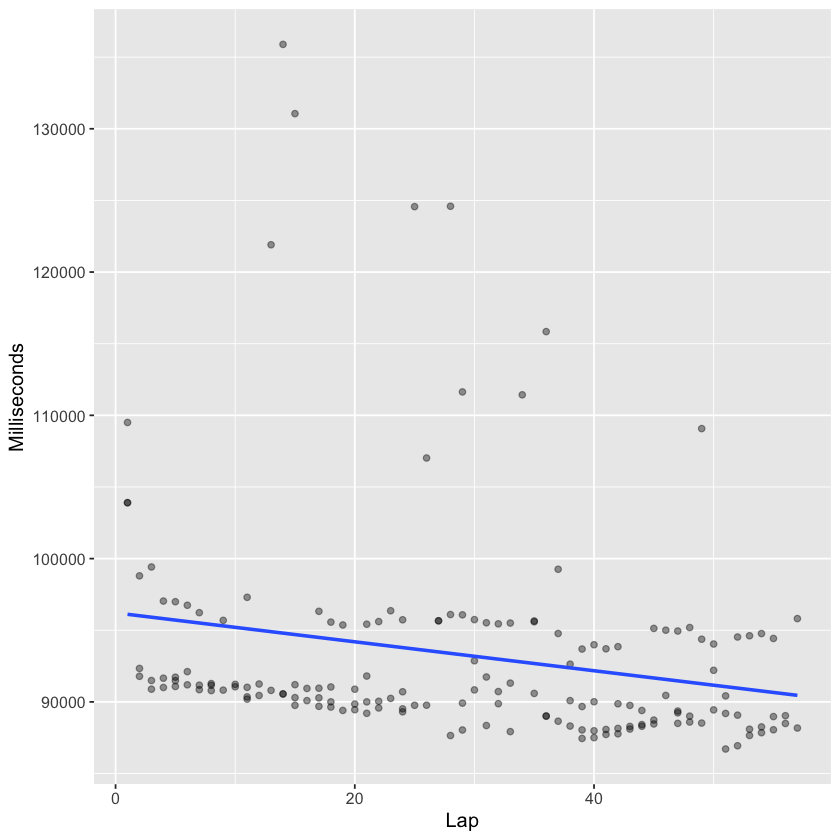

In [8]:
set.seed(2022)

#3. Australia

yt_aus <- tauri_lap %>%
                filter(raceId %in% aus_race_ID) 

yt_aus_clean <- yt_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_aus_clean
yt_aus_clean_ID <- yt_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_aus_races <- tauri_lap %>%
                    filter(raceId %in% yt_aus_clean_ID)

formulaone_split <- initial_split(yt_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 3

initiate_rmse() 

## GETS PREDICTION

get_australia_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



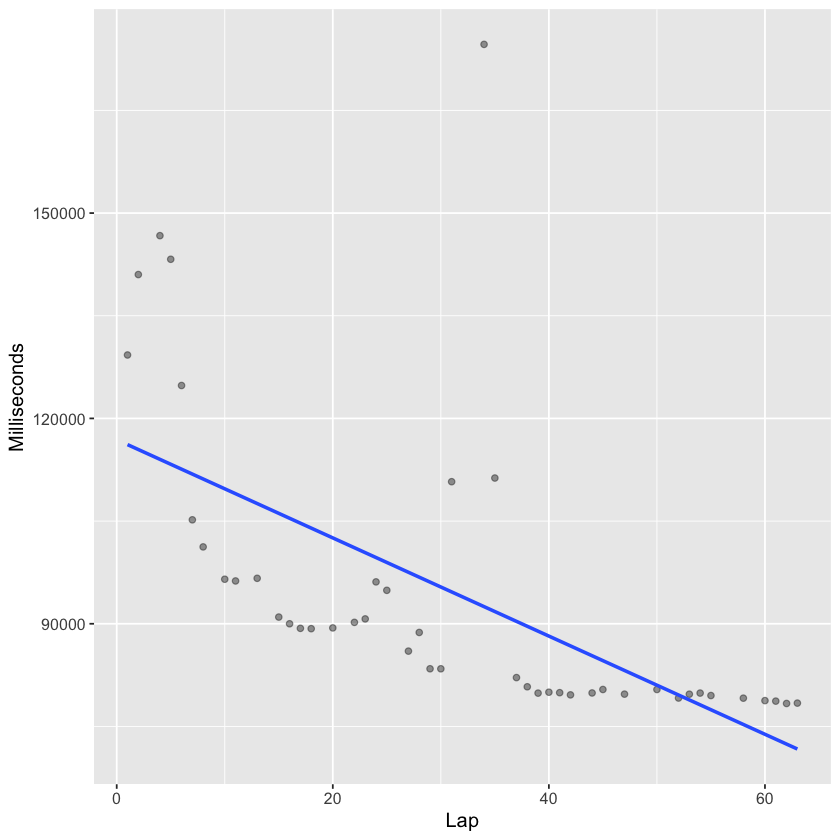

In [9]:
set.seed(2022)

#4. Italy, Imola

yt_imola <- tsu_laps %>%
                filter(raceId %in% imola_race_ID) 

yt_imola_clean <- yt_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_imola_clean_ID <- yt_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_imola_races <- tsu_laps %>%
                    filter(raceId %in% yt_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



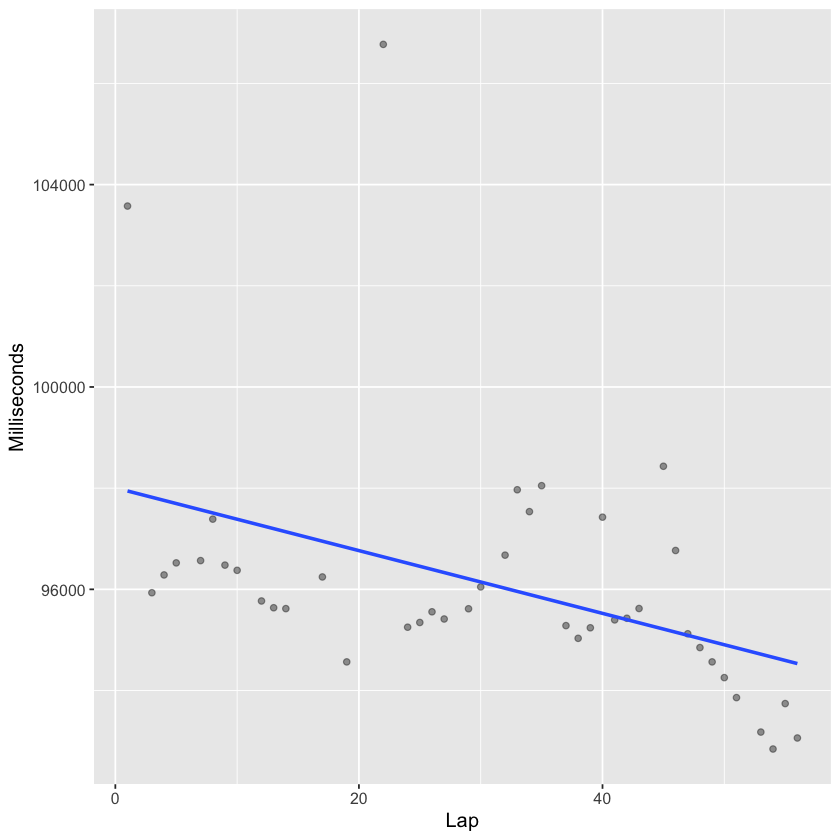

In [10]:
set.seed(2022)

#5. Turkey (Replacing Miami)

yt_turkey <- tsu_laps %>%
                filter(raceId %in% turkey_race_ID) 

yt_turkey_clean <- yt_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_turkey_clean_ID <- yt_turkey_clean %>%
                        pull(raceId)

### SPLITTING DATA

yt_turkey_races <- tsu_laps %>%
                    filter(raceId %in% yt_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`geom_smooth()` using formula 'y ~ x'



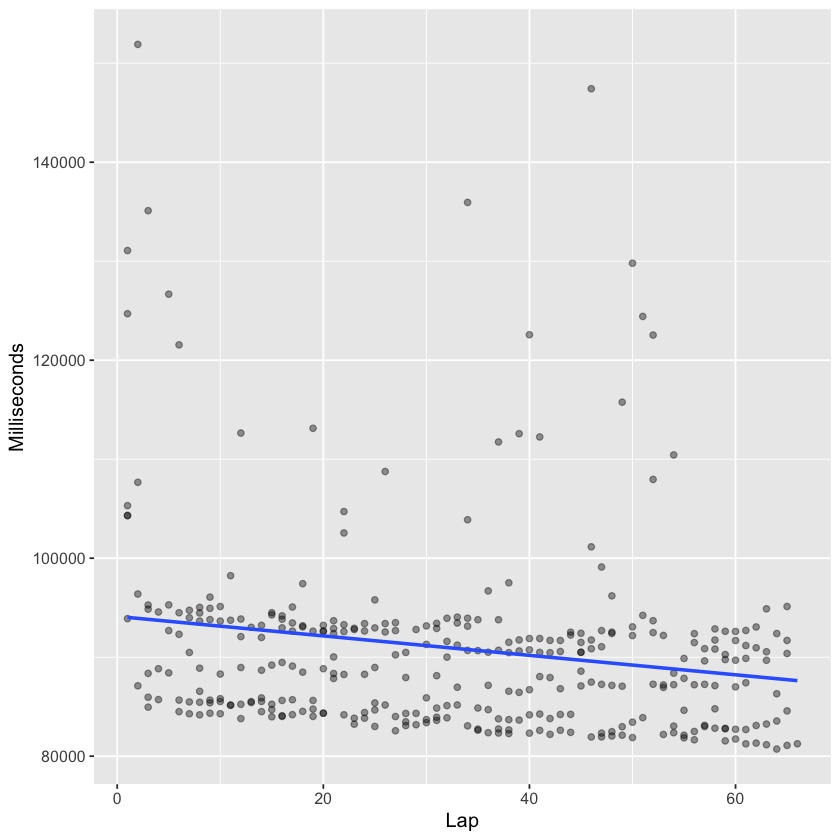

In [11]:
set.seed(2022)

#6. Spain

yt_spain <- tauri_lap %>%
                filter(raceId %in% spain_race_ID) 

yt_spain_clean <- yt_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_spain_clean_ID <- yt_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_spain_races <- tauri_lap %>%
                    filter(raceId %in% yt_spain_clean_ID)

formulaone_split <- initial_split(yt_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



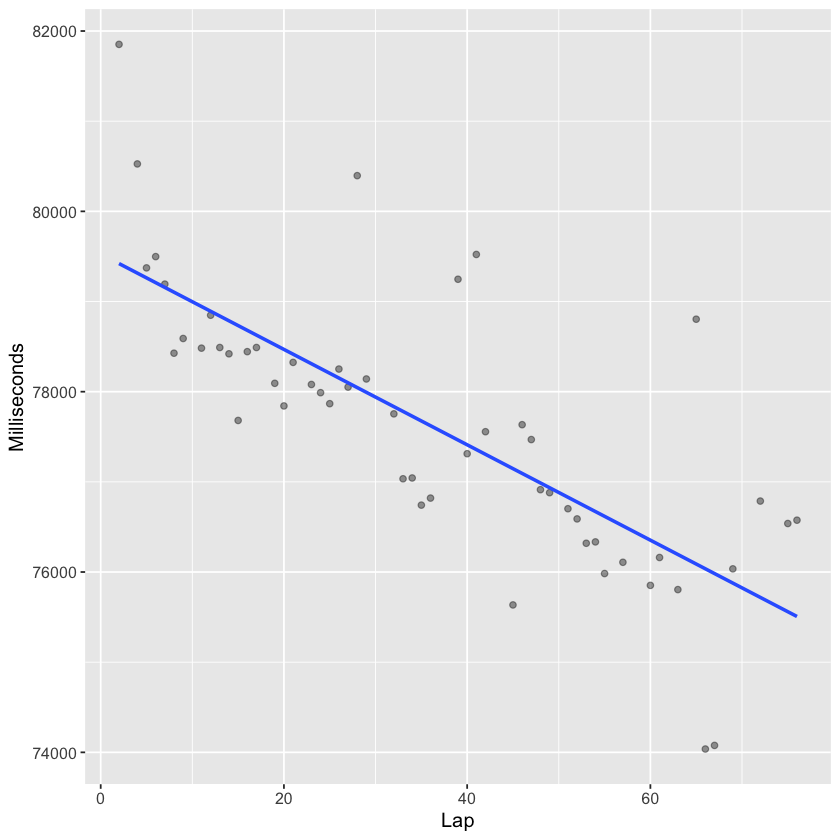

In [12]:
set.seed(2022)

#7. Monaco

yt_monaco <- tsu_laps %>%
                filter(raceId %in% monaco_race_ID) 

yt_monaco_clean <- yt_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_monaco_clean
yt_monaco_clean_ID <- yt_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monaco_races <- tsu_laps %>%
                    filter(raceId %in% yt_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



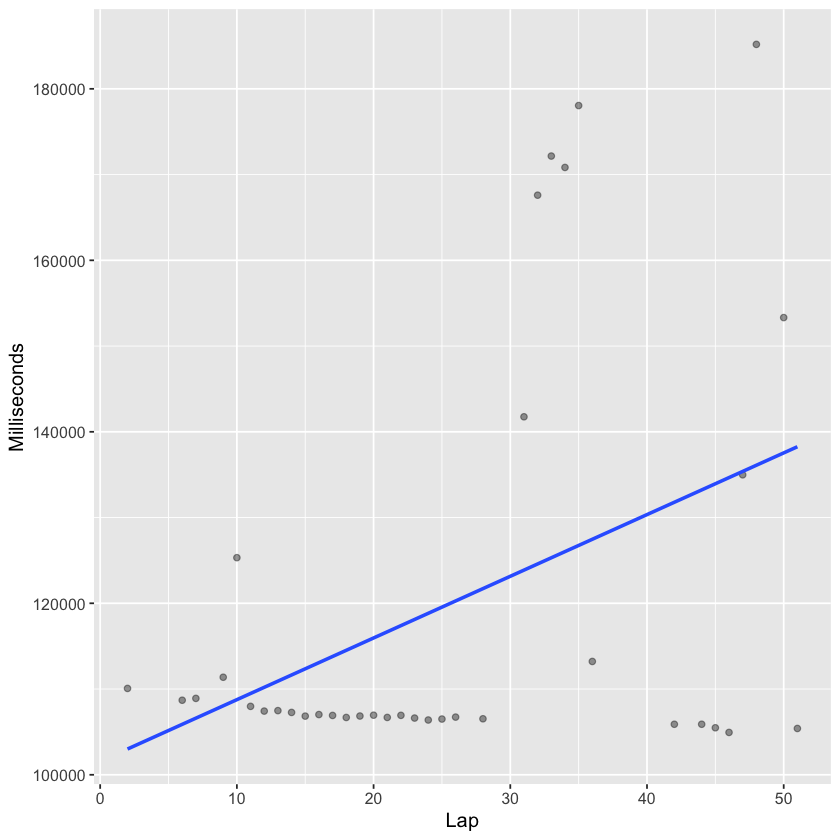

In [13]:
set.seed(2022)

#8. Azerbaijan

yt_azerbaijan <- tsu_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

yt_azerbaijan_clean <- yt_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_azerbaijan_clean
yt_azerbaijan_clean_ID <- yt_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_azerbaijan_races <- tsu_laps %>%
                    filter(raceId %in% yt_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
932,69
954,69
1016,69
975,54
906,47


`geom_smooth()` using formula 'y ~ x'



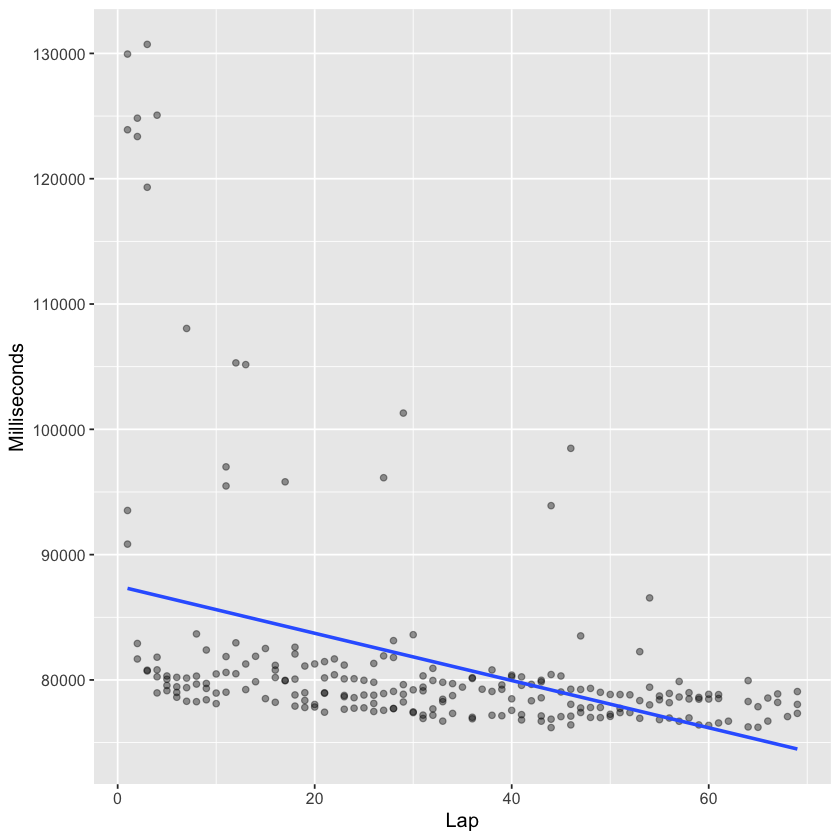

In [14]:
set.seed(2022)

#9. Canada

yt_canada <- tauri_lap %>%
                filter(raceId %in% canada_race_ID) 

yt_canada_clean <- yt_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_canada_clean
yt_canada_clean_ID <- yt_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_canada_races <- tauri_lap %>%
                    filter(raceId %in% yt_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

## GETS PREDICTION

get_canada_prediction()

raceId,n
<dbl>,<int>
1061,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



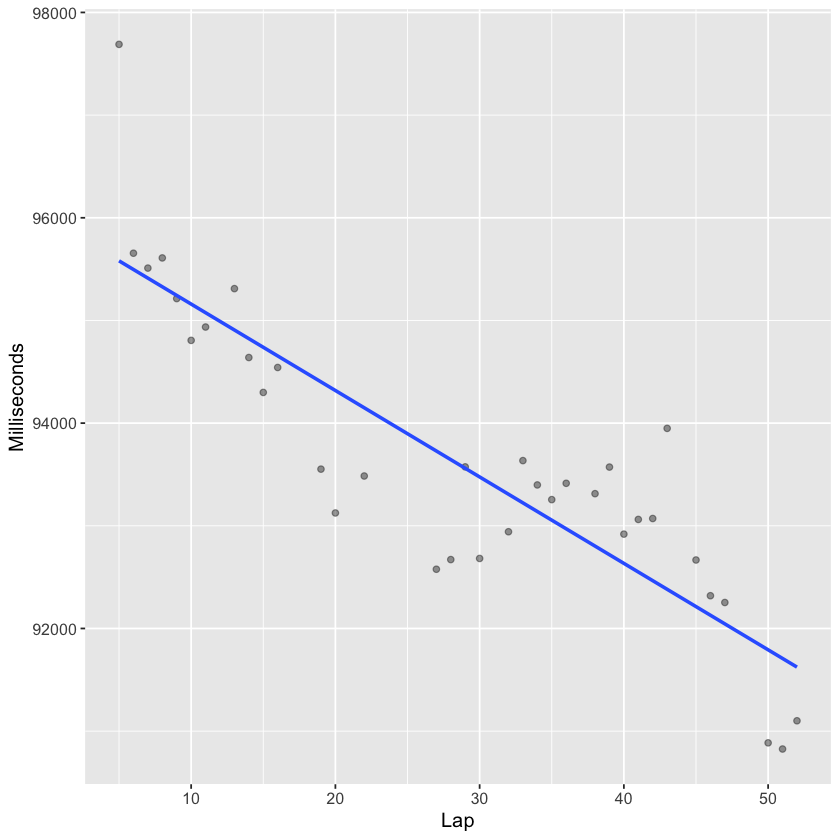

In [15]:
set.seed(2022)

#10. Great Britain

yt_uk <- tsu_laps %>%
                filter(raceId %in% uk_race_ID) 

yt_uk_clean <- yt_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uk_clean
yt_uk_clean_ID <- yt_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uk_races <- tsu_laps %>%
                    filter(raceId %in% yt_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(6:598)

formulaone_split <- initial_split(yt_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

raceId,n
<dbl>,<int>
1058,70
1060,70


`geom_smooth()` using formula 'y ~ x'



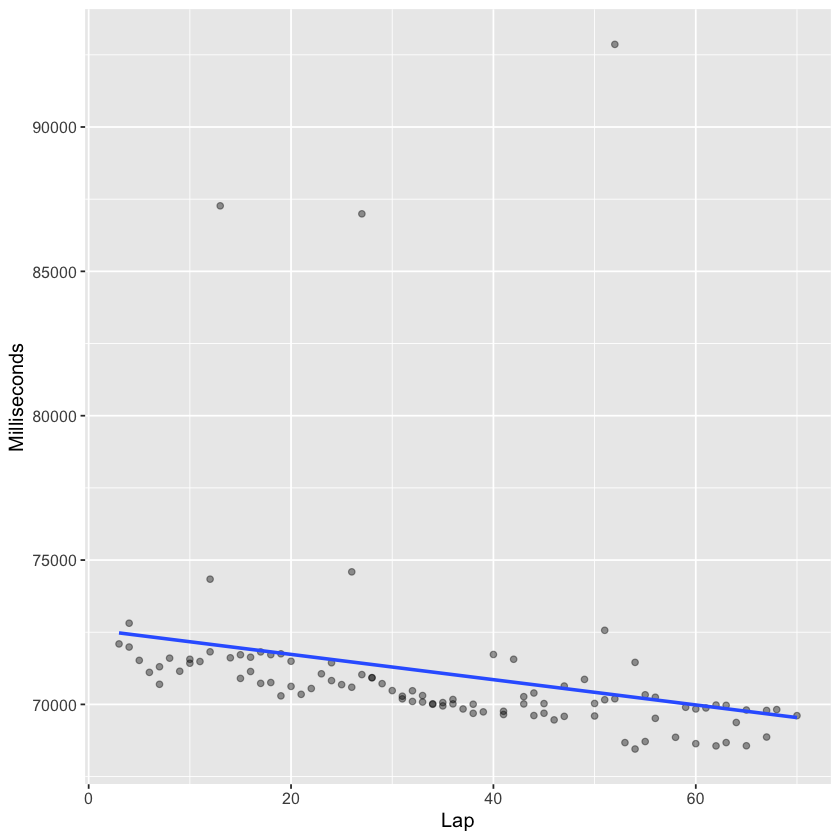

In [16]:
set.seed(2022)

#11. Austria

yt_austria <- tsu_laps %>%
                filter(raceId %in% austria_race_ID) 

yt_austria_clean <- yt_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austria_clean
yt_austria_clean_ID <- yt_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austria_races <- tsu_laps %>%
                    filter(raceId %in% yt_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(yt_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,52
1017,52


`geom_smooth()` using formula 'y ~ x'



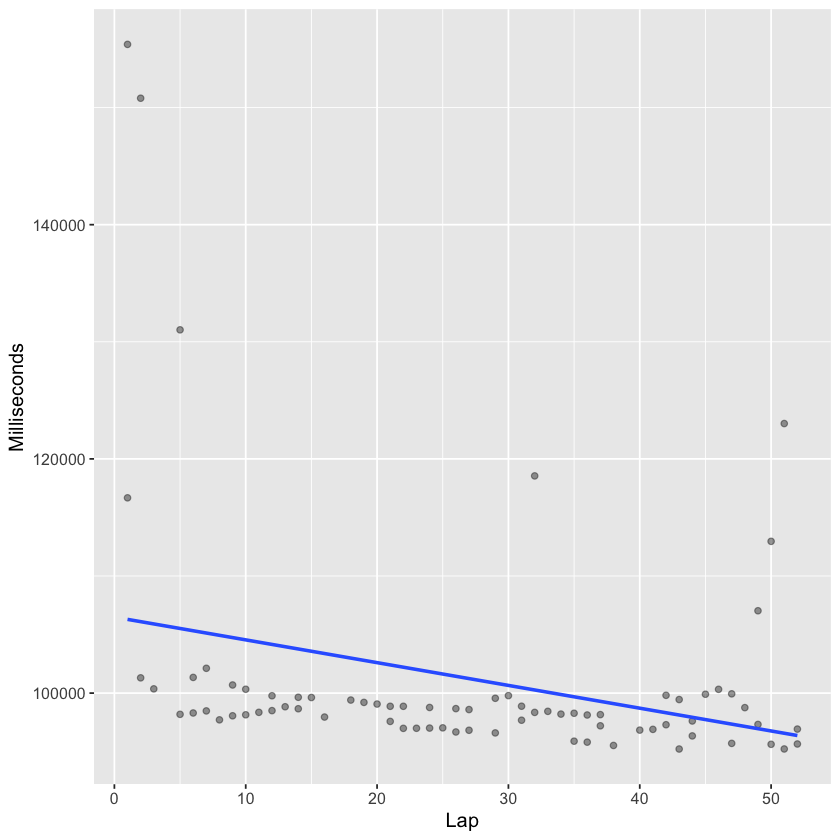

In [17]:
set.seed(2022)

#12. France

yt_france <- tauri_lap %>%
                filter(raceId %in% france_race_ID) 

yt_france_clean <- yt_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_france_clean
yt_france_clean_ID <- yt_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_france_races <- tauri_lap %>%
                    filter(raceId %in% yt_france_clean_ID)

formulaone_split <- initial_split(yt_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

raceId,n
<dbl>,<int>
1062,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



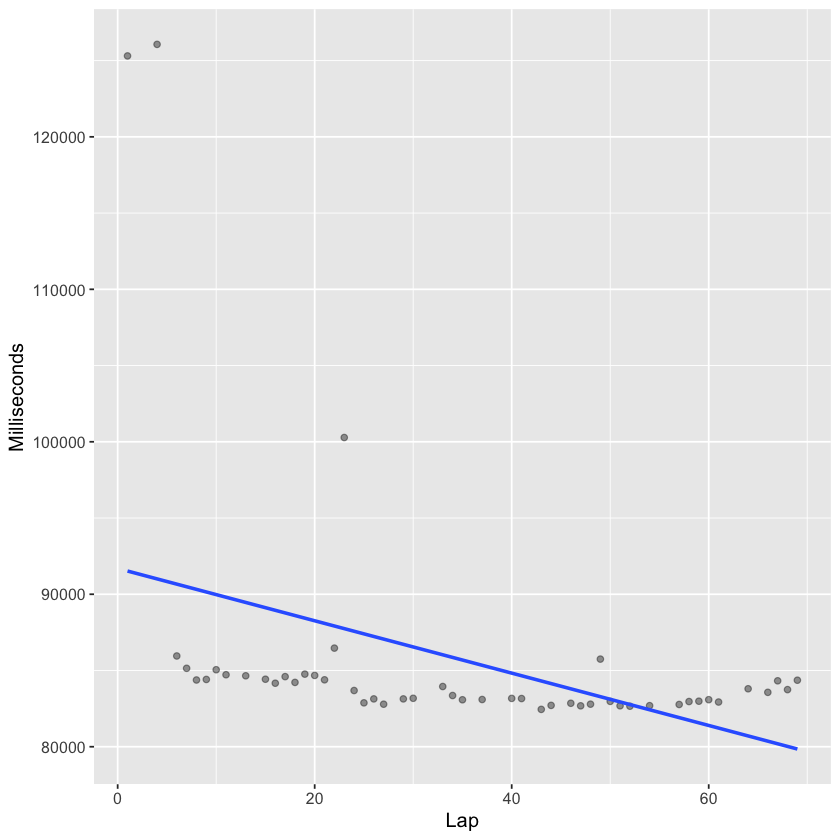

In [18]:
set.seed(2022)

#13. Hungary

yt_hungary <- tsu_laps %>%
                filter(raceId %in% hungary_race_ID) 

yt_hungary_clean <- yt_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
yt_hungary_clean
yt_hungary_clean_ID <- yt_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_hungary_races <- tsu_laps %>%
                    filter(raceId %in% yt_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>% 
                    slice(3:598)

formulaone_split <- initial_split(yt_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
911,44
960,44
980,44
1022,44
1037,44
937,43
1001,43


`geom_smooth()` using formula 'y ~ x'



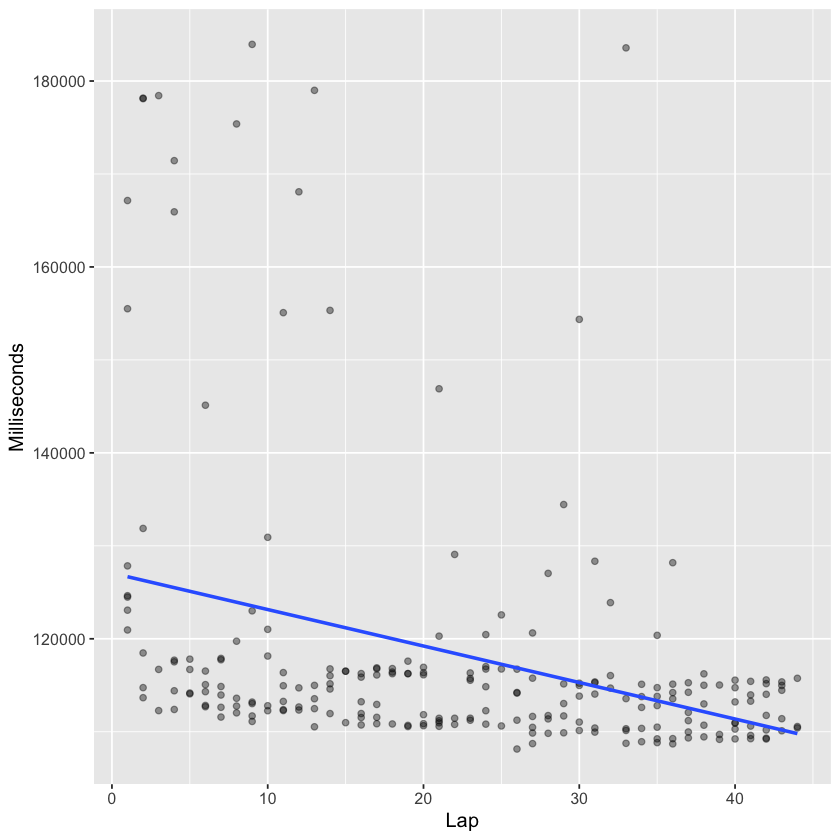

In [19]:
set.seed(2022)

#14. Belgium

yt_belgium <- tauri_lap %>%
                filter(raceId %in% belgium_race_ID) 

yt_belgium_clean <- yt_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_belgium_clean
yt_belgium_clean_ID <- yt_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_belgium_races <- tauri_lap %>%
                    filter(raceId %in% yt_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,48


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



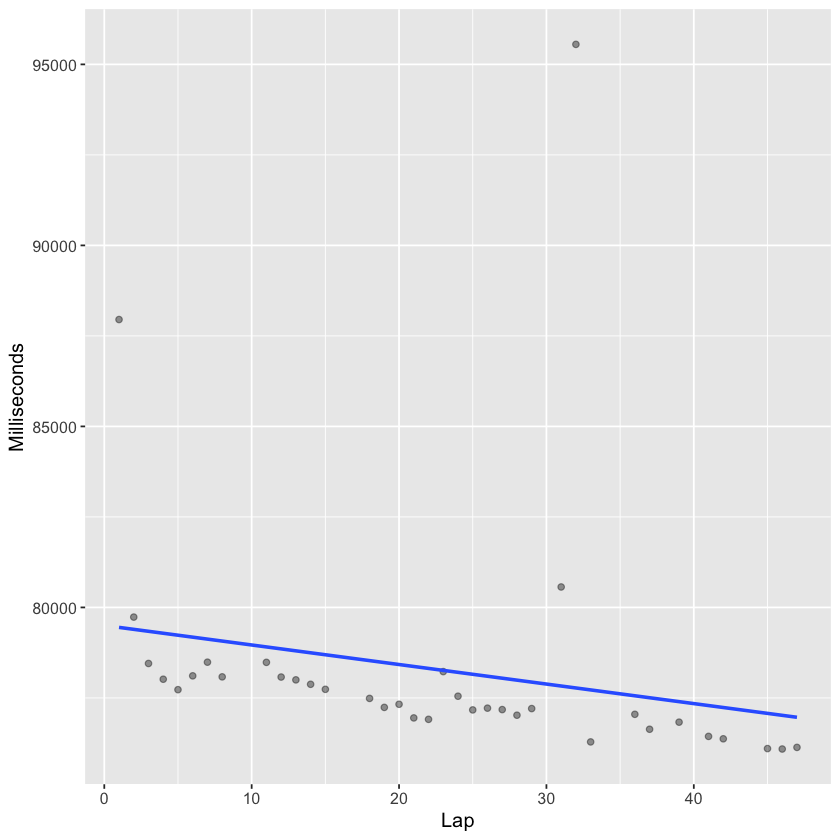

In [20]:
set.seed(2022)

#15. Netherlands

yt_netherlands <- tsu_laps %>%
                filter(raceId %in% netherlands_race_ID) 

yt_netherlands_clean <- yt_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_netherlands_clean
yt_netherlands_clean_ID <- yt_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_netherlands_races <- tsu_laps %>%
                    filter(raceId %in% yt_netherlands_clean_ID)

formulaone_split <- initial_split(yt_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
912,53
1038,53
938,52
981,52
961,36
1023,29


`geom_smooth()` using formula 'y ~ x'



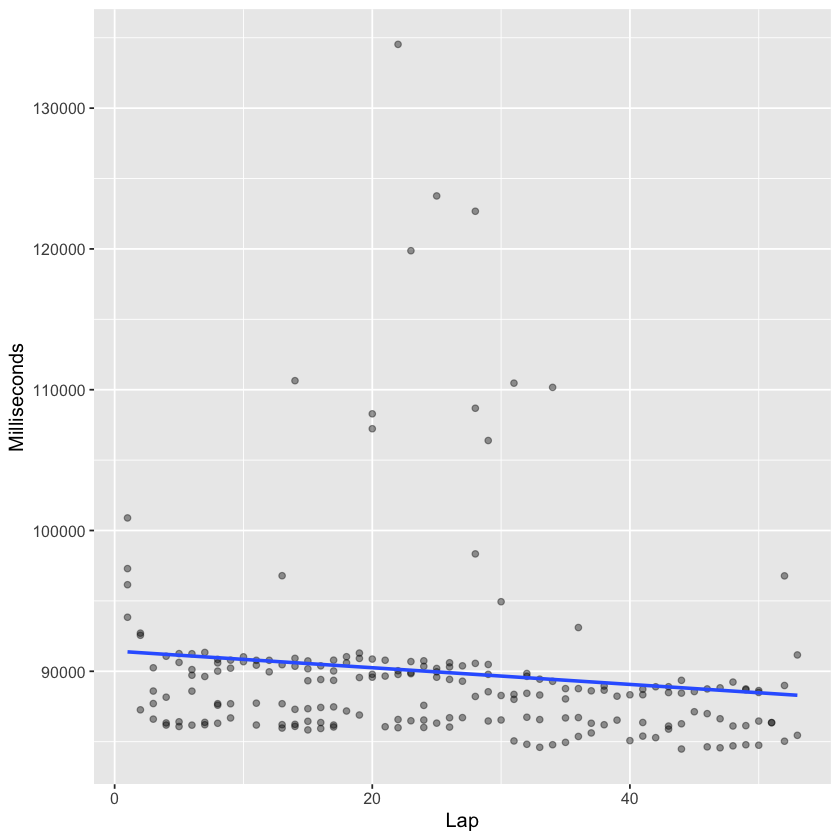

In [21]:
set.seed(2022)

#16. Italy, Monza

yt_monza <- tauri_lap %>%
                filter(raceId %in% monza_race_ID) 

yt_monza_clean <- yt_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
yt_monza_clean
yt_monza_clean_ID <- yt_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monza_races <- tauri_lap %>%
                    filter(raceId %in% yt_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

## GETS PREDICTION

get_monza_prediction()

raceId,n
<dbl>,<int>
939,61
962,61
1024,61
913,60
1003,60
982,10


`geom_smooth()` using formula 'y ~ x'



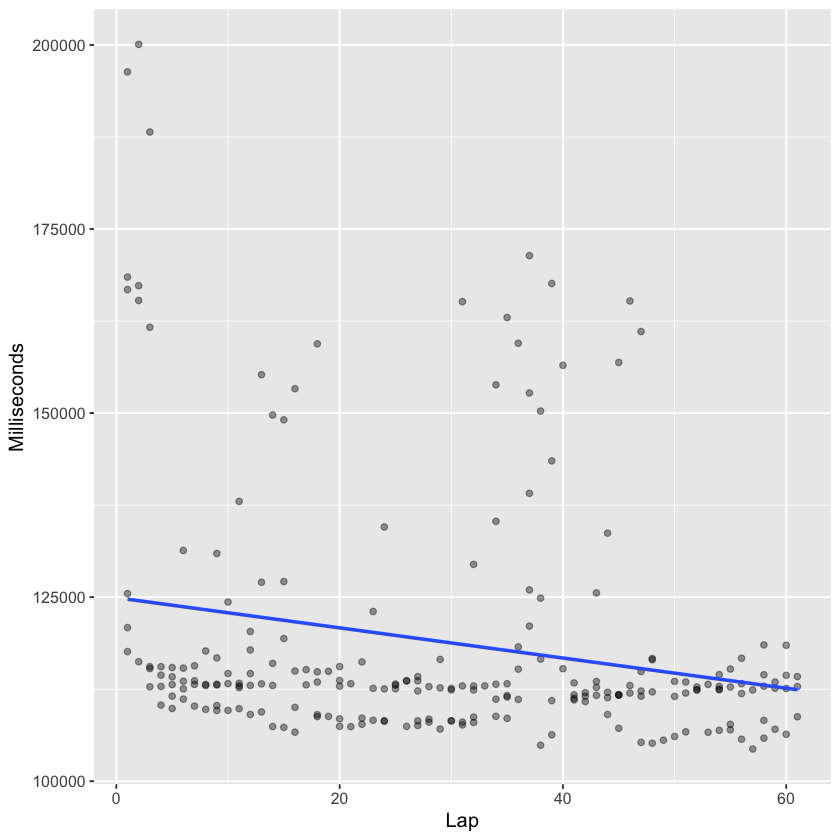

In [22]:
set.seed(2022)

#17. Singapore

yt_singapore <- tauri_lap %>%
                filter(raceId %in% singapore_race_ID) 

yt_singapore_clean <- yt_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_singapore_clean
yt_singapore_clean_ID <- yt_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_singapore_races <- tauri_lap %>%
                    filter(raceId %in% yt_singapore_clean_ID)

formulaone_split <- initial_split(yt_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



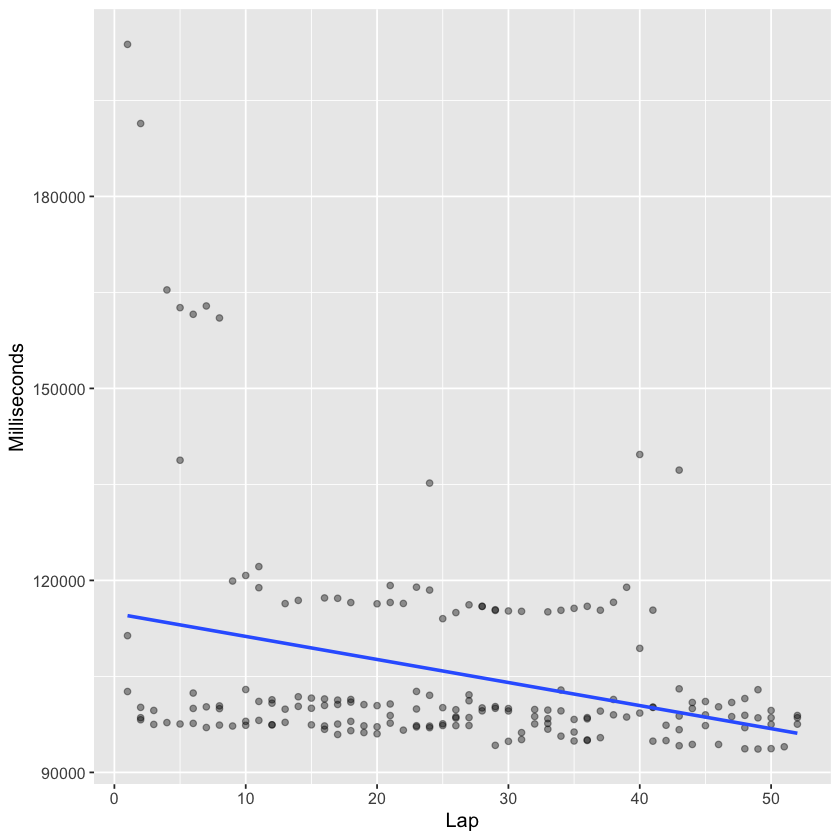

In [23]:
set.seed(2022)

#18. Japan

yt_japan <- tauri_lap %>%
                filter(raceId %in% japan_race_ID) 

yt_japan_clean <- yt_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_japan_clean_ID <- yt_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_japan_races <- tauri_lap %>%
                    filter(raceId %in% yt_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



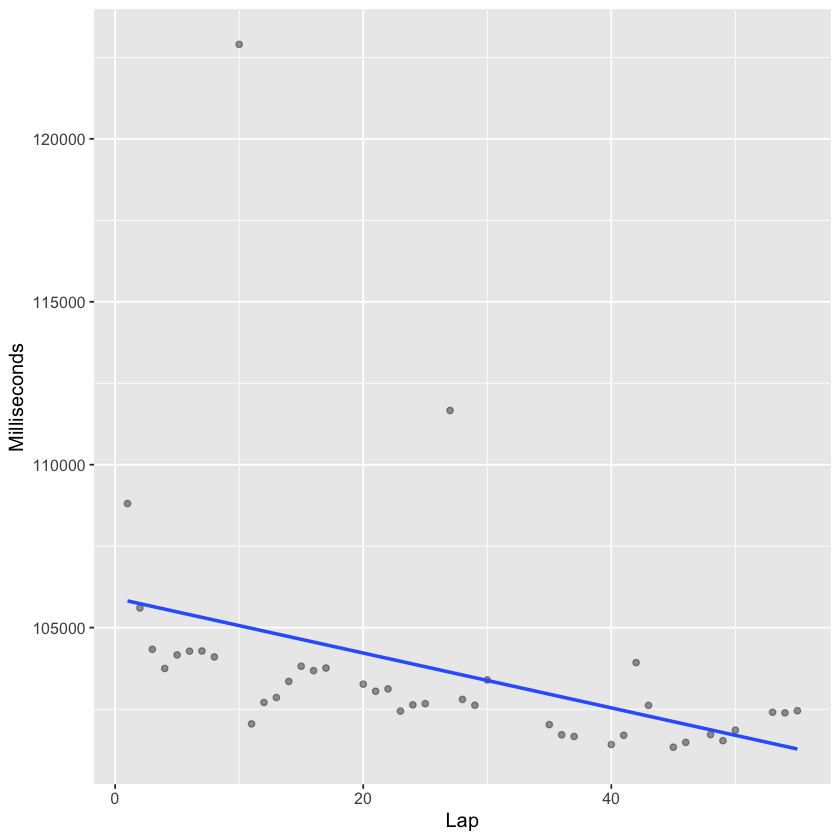

In [24]:
set.seed(2022)

#19. USA, Austin

yt_austin <- tsu_laps %>%
                filter(raceId %in% austin_race_ID) 

yt_austin_clean <- yt_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austin_clean
yt_austin_clean_ID <- yt_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austin_races <- tsu_laps %>%
                    filter(raceId %in% yt_austin_clean_ID)

formulaone_split <- initial_split(yt_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

 get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



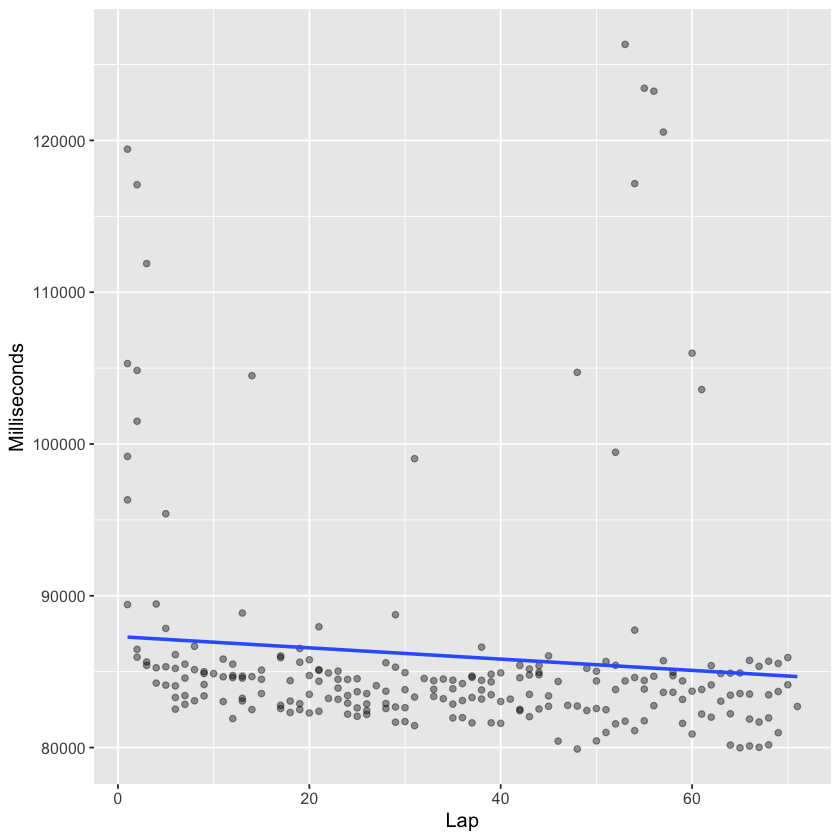

In [25]:
set.seed(2022)

#20. Mexico

yt_mexico <- tauri_lap %>%
                filter(raceId %in% mexico_race_ID) 

yt_mexico_clean <- yt_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_mexico_clean_ID <- yt_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_mexico_races <- tauri_lap %>%
                    filter(raceId %in% yt_mexico_clean_ID)

formulaone_split <- initial_split(yt_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



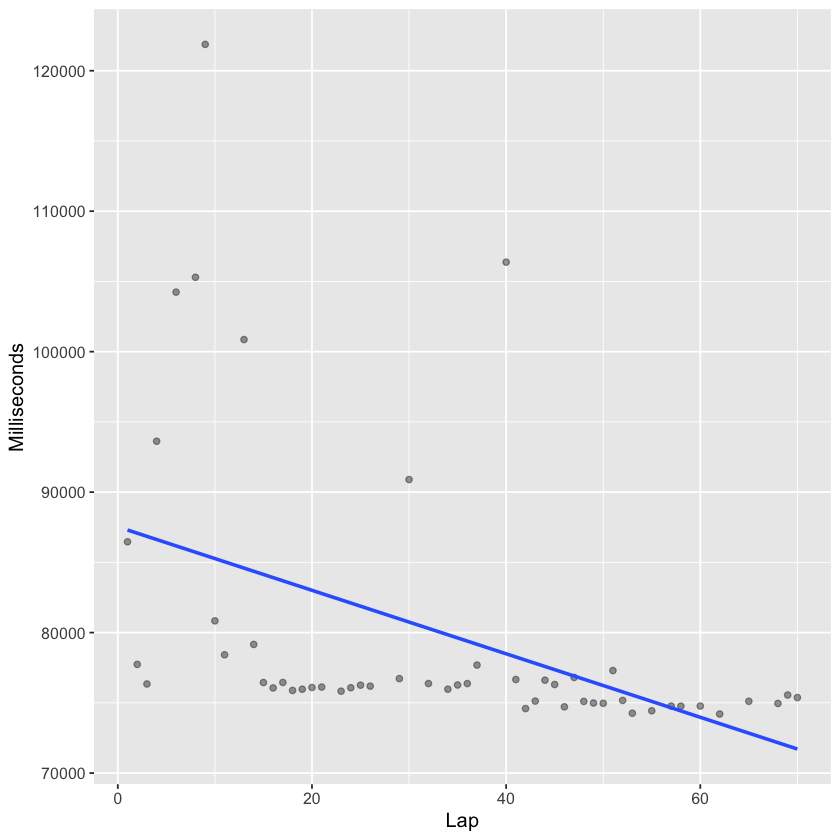

In [26]:
set.seed(2022)

#21. Brazil

yt_brazil <- tsu_laps %>%
                filter(raceId %in% brazil_race_ID) 

yt_brazil_clean <- yt_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_brazil_clean
yt_brazil_clean_ID <- yt_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_brazil_races <- tsu_laps %>%
                    filter(raceId %in% yt_brazil_clean_ID)

formulaone_split <- initial_split(yt_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

 get_brazil_prediction()

raceId,n
<dbl>,<int>
945,55
988,54
1009,54
1030,54
1047,54
918,14
968,14


`geom_smooth()` using formula 'y ~ x'



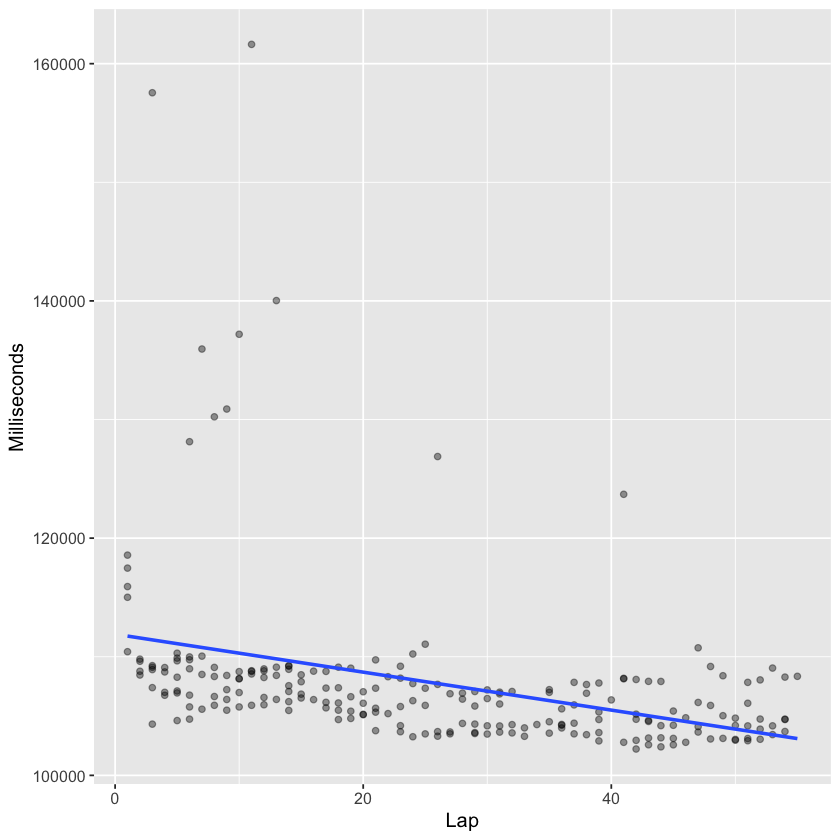

In [27]:
set.seed(2022)

#22. Abu Dhabi

yt_uae <- tauri_lap %>%
                filter(raceId %in% uae_race_ID) 

yt_uae_clean <- yt_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uae_clean
yt_uae_clean_ID <- yt_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uae_races <- tauri_lap %>%
                    filter(raceId %in% yt_uae_clean_ID)

formulaone_split <- initial_split(yt_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

 get_uae_prediction()

## Collection

In [29]:
rmse_col
racetime_col

write_csv(rmse_col, "final_rmse_data/yt_rmse.csv")
write_csv(racetime_col, "final_race_data/yt_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,4927.7993,1
rmse,standard,8084.6528,2
rmse,standard,11094.6029,3
rmse,standard,15204.7684,4
rmse,standard,1481.4723,5
rmse,standard,8058.9699,6
rmse,standard,1112.4605,7
rmse,standard,17774.1544,8
rmse,standard,6182.1857,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5714818,95.24697,1.587449,1
5830616,97.17693,1.619616,2
5407604,90.12673,1.502112,3
5917962,98.63270,1.643878,4
5483828,91.39713,1.523286,5
5994578,99.90963,1.665161,6
6040119,100.66865,1.677811,7
6133828,102.23046,1.703841,8
5656242,94.27069,1.571178,9
